In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpld3 import display

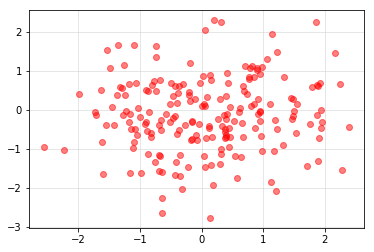

In [2]:
# Scatter points
fig, ax = plt.subplots()
np.random.seed(0)
x, y = np.random.normal(size=(2, 200))
color, size = np.random.random((2, 200))

# ax.scatter(x, y, c=color, s=500 * size, alpha=0.3)
ax.plot(x, y, c='red', alpha=0.5,ls='',marker='o')
ax.grid(color='lightgray', alpha=0.7)

In [3]:
display(fig)

In [5]:
fig, ax = plt.subplots()
np.random.seed(0)
ax.plot(np.random.normal(size=100),
        np.random.normal(size=100),
        'or', ms=10, alpha=0.3)
ax.plot(np.random.normal(size=100),
        np.random.normal(size=100),
        'ob', ms=20, alpha=0.1)

ax.set_xlabel('this is x')
ax.set_ylabel('this is y')
ax.set_title('Matplotlib Plot Rendered in D3!', size=14)
ax.grid(color='lightgray', alpha=0.7)

display(fig)

In [6]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(20), '-o', alpha=0.5,
        color='black', linewidth=5,
        markerfacecolor='green',
        markeredgecolor='lightgreen',
        markersize=20,
        markeredgewidth=10)
ax.grid(True, color='#EEEEEE', linestyle='solid')
ax.set_xlim(-2, 22)
ax.set_ylim(-0.1, 1.1)
display(fig)

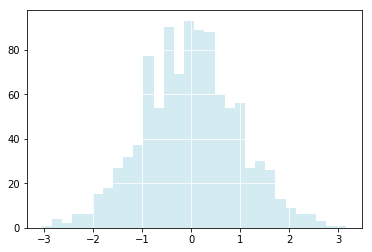

In [7]:
# Histogram with modified axes/grid
fig = plt.figure()

ax = fig.add_subplot(111)
ax.grid(color='white', linestyle='solid')

x = np.random.normal(size=1000)
ax.hist(x, 30, histtype='stepfilled', fc='lightblue', alpha=0.5);

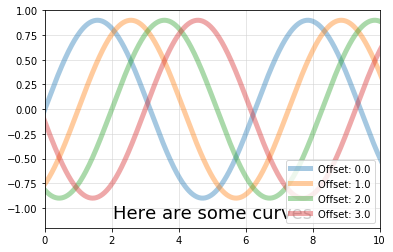

In [8]:
# Draw lines
fig, ax = plt.subplots()
x = np.linspace(-5, 15, 1000)
for offset in np.linspace(0, 3, 4):
    ax.plot(x, 0.9 * np.sin(x - offset), lw=5, alpha=0.4,
            label="Offset: {0}".format(offset))
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.0)
ax.text(5, -1.1, "Here are some curves", size=18, ha='center')
ax.grid(color='lightgray', alpha=0.7)
ax.legend()

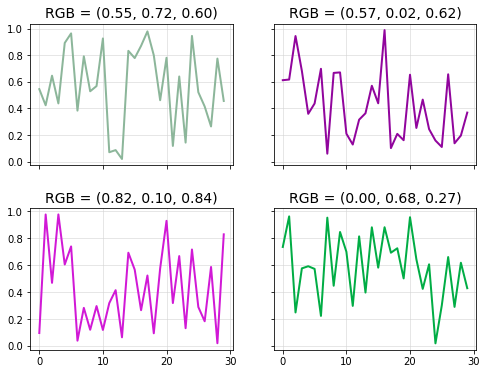

In [9]:
# multiple subplots, shared axes
fig, ax = plt.subplots(2, 2, figsize=(8, 6),sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.3)

np.random.seed(0)

for axi in ax.flat:
    color = np.random.random(3)
    axi.plot(np.random.random(30), lw=2, c=color)
    axi.set_title("RGB = ({0:.2f}, {1:.2f}, {2:.2f})".format(*color),
                  size=14)
    axi.grid(color='lightgray', alpha=0.7)

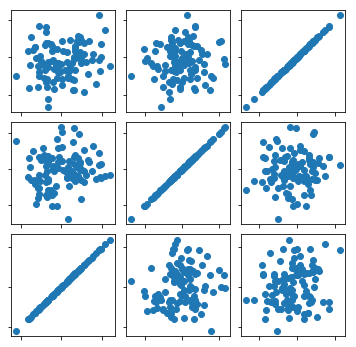

In [10]:
from mpld3 import plugins

fig, ax = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax[::-1]

X = np.random.normal(size=(3, 100))
for i in range(3):
    for j in range(3):
        ax[i, j].xaxis.set_major_formatter(plt.NullFormatter())
        ax[i, j].yaxis.set_major_formatter(plt.NullFormatter())
        points = ax[i, j].scatter(X[j], X[i])
        
plugins.connect(fig, plugins.LinkedBrush(points))

In [11]:
import mpld3
from mpld3 import plugins
from mpld3.utils import get_id
import numpy as np
import collections
import matplotlib.pyplot as plt

N_paths = 5
N_steps = 100

x = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y = y.cumsum(1)

fig, ax = plt.subplots()
labels = ["a", "b", "c", "d", "e"]
line_collections = ax.plot(x, y.T, lw=4, alpha=0.4)
interactive_legend = plugins.InteractiveLegendPlugin(line_collections, labels)
plugins.connect(fig, interactive_legend)

mpld3.display()

In [16]:
N_paths = 5
N_steps = 100

x1 = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y1 = y.cumsum(1)

x2 = np.linspace(0, 10, 100)
y = 0.1 * (np.random.random((N_paths, N_steps)) - 0.5)
y2 = y.cumsum(1)

fig, ax = plt.subplots()
labels = ["a", "b",]
l1 = ax.plot(x1, y1.T, lw=4, alpha=0.1, c='b', label='a')
l2 = ax.plot(x2, y2.T, lw=4, alpha=0.2, c='r', label='b')

line_collections = [l1,l2]
plugins.connect(fig, plugins.InteractiveLegendPlugin(line_collections, labels))

mpld3.display()